

# Project: TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set contains information about 10,000 movies collected from The **Movie Database (TMDb)**, including user ratings and revenue.
>
>● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
>
>● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
>
>● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>

### Questions to be addressed from this data analysis are as follows
>
>1. Which genres are most popular from year to year?
>
>2. What kinds of properties are associated with movies that have high revenues?
>
>3. Display the title of a movie having runtime >= 180 Minutes
>
>4. In Which year was The highest Average Revenue?
>
>5. Find the Average rating for each Director?
>
>6. Display the Top 10 Lengthy Movies Title and Runtime?
>
>7. Display the Number of movies per year?
>
>8. Find the most Popular Movie Title(Highest Revenue)?
>
>9. Display the Top Highest Rated Movies Titles And its Directors?
>
>10. Display the Top 10 Highest Revenue Movie Titles?
>
>11. Find Average Rating of Movies Year Wise ?
>
>12. Movies Based on Ratings [Excellent, Good and Average] ?
>
>13. Count the Number of Action Movies?
>
>14. Find the unique values from generes?
>
>15. Which director produces the higher number of movies? (Top 10)

In [1]:
#  import all required packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


###   Load  and Read the data
> load and read the movie database. Store it in a variable called `tmdb-movies.csv`.

In [2]:
# Load the data and print out a few lines. Perform operations to inspect data

df = pd.read_csv('tmdb-movies.csv')

In [3]:
#   types and look for instances of missing or possibly errant data.
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
#Find the shape of the dataset( Number of rows and Columns)
df.shape

(10866, 21)

In [5]:
#Getting detail information about our dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning 

>We will remove Null value data, duplicates, uncessary columns and  outlier raw datas

In [6]:
# list the nulll values from the  movie data
df.isnull().sum(axis=0).sort_values(ascending=False)

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
budget_adj                 0
release_year               0
vote_average               0
vote_count                 0
release_date               0
id                         0
runtime                    0
original_title             0
revenue                    0
budget                     0
popularity                 0
revenue_adj                0
dtype: int64

In [7]:
# column-wise null percentages here
df.isnull().sum(axis=0).sort_values(ascending=False)/len(df) * 100

homepage                72.979937
tagline                 25.989324
keywords                13.740107
production_companies     9.479109
cast                     0.699429
director                 0.404933
genres                   0.211669
imdb_id                  0.092030
overview                 0.036812
budget_adj               0.000000
release_year             0.000000
vote_average             0.000000
vote_count               0.000000
release_date             0.000000
id                       0.000000
runtime                  0.000000
original_title           0.000000
revenue                  0.000000
budget                   0.000000
popularity               0.000000
revenue_adj              0.000000
dtype: float64

In [8]:
# genres raw is essential for our data analysis and we have to remove the null value raws of genres         
df.dropna(how='any', subset=['genres'], inplace=True)

In [9]:
# removing non useful collumns for data analysis including 
# homepage, tagline ,imdb_id, overview, and keywords, cast, and production_companies columns 
df.drop(columns = ['homepage','tagline','keywords','production_companies','imdb_id','cast','overview',], inplace=True) 

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10843.000000,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,65868.491930,0.647456,1.465672e+07,3.990779e+07,102.137508,217.813705,5.973974,2001.315595,1.758827e+07,5.147332e+07
std,91977.394803,1.000986,3.093864e+07,1.171131e+08,31.293320,576.155351,0.934260,12.813298,3.433299e+07,1.447664e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.500000,0.208253,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20558.000000,0.384555,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75182.000000,0.715349,1.500000e+07,2.413675e+07,111.000000,146.000000,6.600000,2011.000000,2.093530e+07,3.387655e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
# From  the above collumn we can see that more than 50% of the adjusted revenue collumn data is to 0.0 
# We will drop the 0.0 value  rows of the adjusted revenue

revenuedf=df.drop(df.index[df['revenue_adj'] ==0.0])

In [12]:
revenuedf.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4850.000000,4850.000000,4.850000e+03,4.850000e+03,4850.000000,4850.000000,4850.000000,4850.000000,4.850000e+03,4.850000e+03
mean,44575.000619,1.045109,2.956970e+07,8.922066e+07,107.964742,436.215876,6.148763,2000.921649,3.516102e+07,1.150774e+08
std,72361.405911,1.356628,4.051343e+07,1.620684e+08,21.112847,806.416200,0.798795,11.569192,4.375672e+07,1.988419e+08
min,5.000000,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,8286.000000,0.387754,1.700000e+06,7.708081e+06,95.000000,46.000000,5.600000,1994.000000,2.332078e+06,1.046262e+07
50%,12154.500000,0.680289,1.500000e+07,3.182654e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.392749e+07
75%,43956.500000,1.210457,4.000000e+07,9.991823e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.315644e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
#  read the avalible columns and rows after removing the above collumns 
revenuedf.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4850 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4850 non-null   int64  
 1   popularity      4850 non-null   float64
 2   budget          4850 non-null   int64  
 3   revenue         4850 non-null   int64  
 4   original_title  4850 non-null   object 
 5   director        4849 non-null   object 
 6   runtime         4850 non-null   int64  
 7   genres          4850 non-null   object 
 8   release_date    4850 non-null   object 
 9   vote_count      4850 non-null   int64  
 10  vote_average    4850 non-null   float64
 11  release_year    4850 non-null   int64  
 12  budget_adj      4850 non-null   float64
 13  revenue_adj     4850 non-null   float64
dtypes: float64(4), int64(6), object(4)
memory usage: 568.4+ KB


In [14]:
#No duplicated row 
df.duplicated().sum()

1

In [15]:
#We have one duplicate values and we have drop the duplicate row as true
print("After removing the duplicate values (Rows,Columns) : ",df.shape)

After removing the duplicate values (Rows,Columns) :  (10843, 14)


In [16]:
revenuedf.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


<strong> we have cleaned the data and we will go further analysis  <strong>

<a id='eda'></a>
## Exploratory Data Analysis



###  Question 1 Which genres are most popular from year to year? 

In [17]:
df['popularity'].describe()

count    10843.000000
mean         0.647456
std          1.000986
min          0.000065
25%          0.208253
50%          0.384555
75%          0.715349
max         32.985763
Name: popularity, dtype: float64

<strong> we can see that majority of the popularit is  1. Those movies popularit with higher than 1 are more popular <strong>

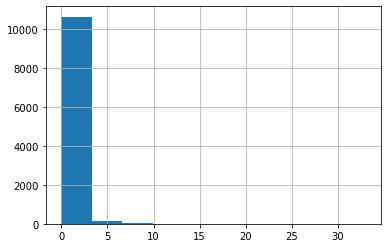

In [18]:
# visualizing the popularity data
df.popularity.hist();

<strong> Genres row has more than one values and for better analysis we will separate its comumn and create each row for each genre and perform the calculation.<strong> 

In [19]:
# separate the genres which is separated by 
df.genres = df.genres.str.split('|')

In [20]:
# create genre list( create each row for each gen) using explode 
df = df.explode('genres')

In [21]:
# dispaly the release year, generes and popularity group by the release year.
df.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1)

release_year  release_year  genres         
1960          1960          Thriller           0.811910
1961          1961          Animation          2.631987
1962          1962          Adventure          0.942513
1963          1963          Animation          2.180410
1964          1964          War                0.930959
1965          1965          Music              0.968850
1966          1966          Animation          0.585717
1967          1967          Animation          1.348805
1968          1968          Mystery            1.519456
1969          1969          Crime              0.948020
1970          1970          Animation          1.127719
1971          1971          Family             1.530722
1972          1972          Crime              1.072768
1973          1973          Animation          0.956526
1974          1974          Mystery            0.702035
1975          1975          Adventure          0.880297
1976          1976          Crime              0.707249
1977

In [22]:
# clean up the data by removing extra row index by reset index
genredata = df.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True)

In [23]:
# change the pandas series to pandas dataframe
genredata = genredata.reset_index()

In [24]:
# display the table 
genredata.head()

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959


Text(0.5, 1.0, 'The most Popular genres of each year')

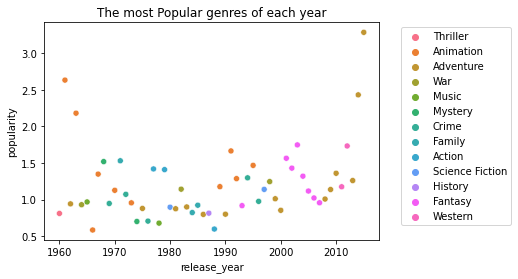

In [25]:
# visualizing the data
sns.scatterplot(x='release_year', y='popularity', data=genredata, hue='genres')
#plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.title("The most Popular genres of each year")

In [26]:
# generate the summary of of genres 
genredata.genres.value_counts()

Adventure          14
Animation          10
Fantasy             8
Crime               5
War                 3
Family              3
Action              3
Music               2
Mystery             2
Science Fiction     2
Western             2
Thriller            1
History             1
Name: genres, dtype: int64

<strong> It is identified that there is no trendy of the movie from the above data anlysis  <strong>

###  Question 2 What kinds of properties are associated with movies that have high revenues?

In [27]:
revenuedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4850 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4850 non-null   int64  
 1   popularity      4850 non-null   float64
 2   budget          4850 non-null   int64  
 3   revenue         4850 non-null   int64  
 4   original_title  4850 non-null   object 
 5   director        4849 non-null   object 
 6   runtime         4850 non-null   int64  
 7   genres          4850 non-null   object 
 8   release_date    4850 non-null   object 
 9   vote_count      4850 non-null   int64  
 10  vote_average    4850 non-null   float64
 11  release_year    4850 non-null   int64  
 12  budget_adj      4850 non-null   float64
 13  revenue_adj     4850 non-null   float64
dtypes: float64(4), int64(6), object(4)
memory usage: 568.4+ KB


In [28]:
#Sorting the data by the revenue_adj column descendingly

highrev = pd.DataFrame(revenuedf['revenue'].sort_values(ascending=False))
data_set = ['id','popularity','budget','original_title','director','runtime','genres','vote_average','release_year']
for i in data_set:
    highrev[i] = revenuedf[i]
    highrev.head()

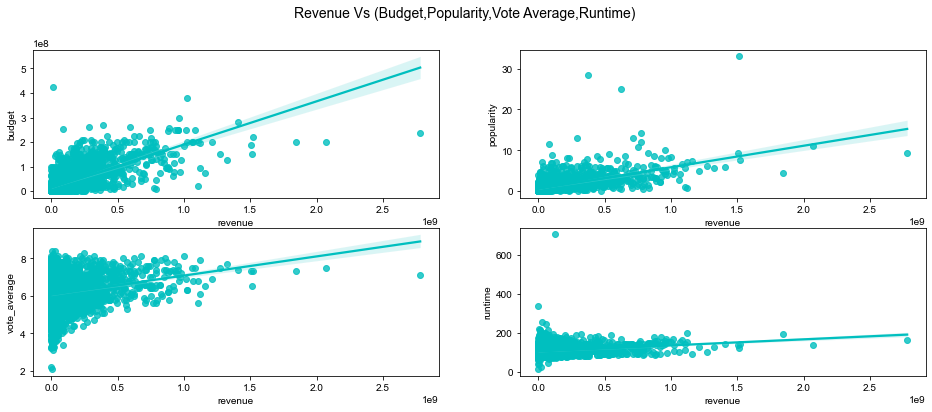

In [29]:
# visualizing the data
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue Vs (Budget,Popularity,Vote Average,Runtime)",fontsize=14)
sns.regplot(x=revenuedf['revenue'], y=revenuedf['budget'],color='c',ax=axes[0][0])
sns.regplot(x=revenuedf['revenue'], y=revenuedf['popularity'],color='c',ax=axes[0][1])
sns.regplot(x=revenuedf['revenue'], y=revenuedf['vote_average'],color='c',ax=axes[1][0])
sns.regplot(x=revenuedf['revenue'], y=revenuedf['runtime'],color='c',ax=axes[1][1])
sns.set_style("whitegrid")

In [30]:
def plot_correlation_map( revenuedf ):
    corr = revenuedf.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

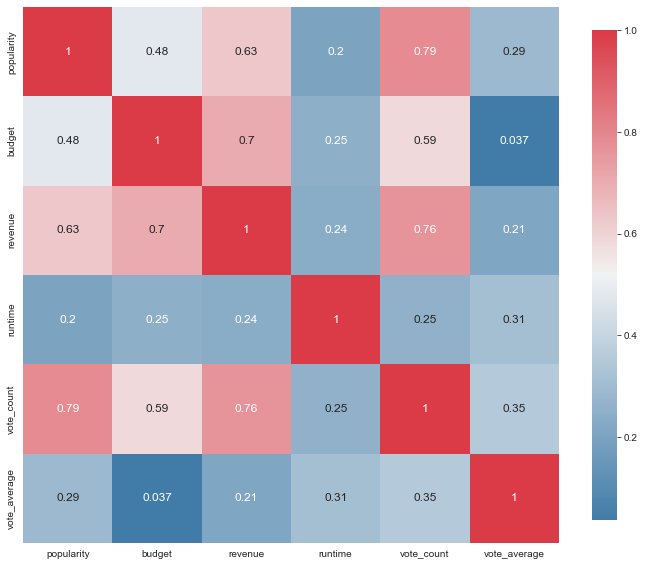

In [31]:
# visualizing the data
plot_correlation_map(revenuedf[['popularity','budget','revenue','runtime','vote_count','vote_average']])

From the above plot we can sumerize the finding as show below.

I. **Budget vs. Revenue**: Although revenues increase slightly at higher levels, the number of films with large budgets appears to be limited. There is a good chance that movies with higher investments will earn more money.The coefficient of  correlation  between budget and revenue  is 0.7.

As we have see the plot we can't find relationship at here. The revenues do not appear to change as the vote average rises.

II. **Popularity vs. Revenue**: Popularity appears to be increasing with revenue. We can say that if a movie is popular, then its revenue will be high. The coefficient of  correlation  between  popularity and income is 0.63. 

III. **Average Vote vs Revenue** : The coefficient of correlation between revenue and vote average is 0.21. As a result, the vote average is not strongly related to revenue.


VI. **Revenue vs. Runtime** :Revenue and runtime have a 0.24 correlation. As a result, runtime is not strongly related to revenue. 


###  Question 3  Display the title of a movie having runtime >= 180 Minutes

In [32]:
# display the movie which has greather than or equal to 180 min runtime movies
revenuedf[revenuedf['runtime']>=180]['original_title']

2107                                            Carlos
2414                                    The Green Mile
2469                                          Magnolia
2642                                      Pearl Harbor
2722                                  Band of Brothers
2741                                    Dil Chahta Hai
3110                                      Jodhaa Akbar
3235                                           Ghajini
4222                                        Wyatt Earp
4949     The Lord of the Rings: The Return of the King
5065                                 Gods and Generals
5231                                           Titanic
5428                           The Wolf of Wall Street
6215                                         King Kong
7332                                     Heaven's Gate
7471                                        Grindhouse
8002                                   The Right Stuff
8134                                             Nixon
8282      

###  Question 4 In which year was the highest average revenue?

In [33]:
revenuedf.groupby('release_year')['revenue'].mean().sort_values(ascending=False)

release_year
2015    1.239002e+08
2012    1.142057e+08
2009    1.109009e+08
2003    1.089082e+08
2014    1.067156e+08
2002    1.053498e+08
2001    1.047663e+08
2004    1.024014e+08
2013    1.012444e+08
2010    1.007339e+08
1997    9.958106e+07
2007    9.954702e+07
2000    9.890722e+07
2011    9.832196e+07
1999    9.623485e+07
2008    9.432862e+07
1965    9.161637e+07
1995    9.156341e+07
1977    9.085763e+07
2005    8.976541e+07
1998    8.955825e+07
1994    8.155666e+07
1996    7.991819e+07
2006    7.900844e+07
1992    7.412382e+07
1973    7.199889e+07
1990    6.902814e+07
1991    6.723714e+07
1989    6.707693e+07
1993    6.439955e+07
1975    6.383266e+07
1979    6.239981e+07
1982    6.146110e+07
1978    5.707415e+07
1967    5.270247e+07
1976    5.006285e+07
1984    4.972688e+07
1972    4.947302e+07
1969    4.879142e+07
1987    4.808479e+07
1974    4.779646e+07
1988    4.616729e+07
1980    4.535032e+07
1983    4.437556e+07
1981    4.436516e+07
1970    4.309400e+07
1985    4.292198e+07


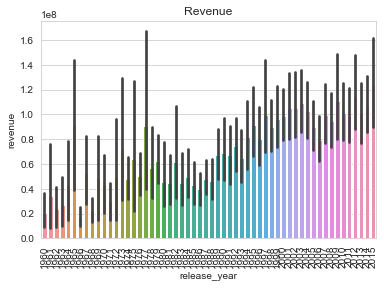

In [34]:
# visualizing the data
sns.barplot(x=revenuedf['release_year'], y=revenuedf['revenue'])
plt.title("Revenue")
plt.xticks(rotation=90)
plt.show()

###  Question 5  Find the average rating for each director ?

In [35]:
revenuedf.groupby('director')['vote_average'].mean().sort_values(ascending=False)

director
Damien Chazelle                                                                                                   8.2
Richard Press                                                                                                     8.1
Phil Alden Robinson|Richard Loncraine|Mikael Salomon|David Nutter|Tom Hanks|David Leland|David Frankel|Tony To    8.0
Pete Docter                                                                                                       8.0
Lauren Lazin                                                                                                      8.0
                                                                                                                 ... 
Robert Young                                                                                                      3.4
Farhad Mann                                                                                                       3.3
Vince Offer                                    

###  Question 6  Display Top 10 lengthy movies title and runtime?

In [36]:
Top10_len = revenuedf.nlargest(10,'runtime')[['original_title', 'runtime']]\
.set_index('original_title')

In [37]:
Top10_len

,runtime
original_title,
Band of Brothers,705
Carlos,338
Gettysburg,254
Cleopatra,248
Heaven's Gate,219
Lawrence of Arabia,216
Gods and Generals,214
Jodhaa Akbar,213
Malcolm X,202


<AxesSubplot:xlabel='runtime', ylabel='original_title'>

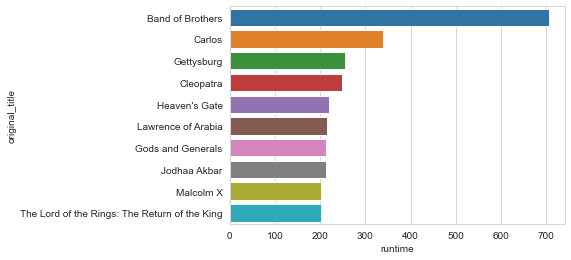

In [38]:
# visualizing the data
sns.barplot(x='runtime', y=Top10_len.index, data=Top10_len)

###  Question 7  Display the number of movies per year ?

In [39]:
revenuedf['release_year'].value_counts()

2013    244
2011    241
2014    228
2010    218
2012    216
2015    216
2008    206
2006    206
2009    200
2007    195
2005    184
2004    164
2002    139
2003    139
2001    128
1999    118
2000    111
1993    108
1997    107
1998    106
1996    104
1995    100
1994     87
1992     82
1988     81
1990     77
1989     77
1986     76
1987     72
1991     70
1985     67
1984     53
1983     52
1981     40
1982     40
1980     39
1979     27
1978     24
1977     24
1973     17
1974     17
1976     16
1975     15
1971     14
1967     14
1970     13
1968     12
1961     10
1972     10
1962      9
1964      8
1960      7
1963      7
1965      5
1969      5
1966      5
Name: release_year, dtype: int64

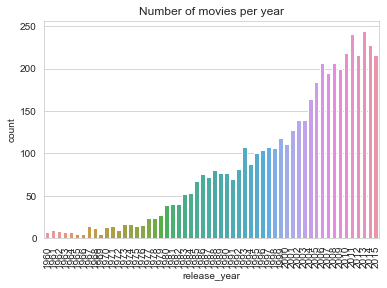

In [40]:
# visualize the data
sns.countplot(x=revenuedf['release_year'])
plt.title("Number of movies per year")
plt.xticks(rotation=90)
plt.show()

###  Question 8  Find the most popular movie title(Highest Revenue)?

In [41]:
revenuedf[revenuedf['revenue'].max()==revenuedf['revenue']]['original_title']

1386    Avatar
Name: original_title, dtype: object

###  Question 9  Display the top highest rated movies titles and its directors?

In [42]:
top10_len = revenuedf.nlargest(10,'vote_average')[['original_title', 'vote_average', 'director']]\
.set_index('original_title')

In [43]:
top10_len

,vote_average,director
original_title,,
The Shawshank Redemption,8.4,Frank Darabont
Stop Making Sense,8.4,Jonathan Demme
The Godfather,8.3,Francis Ford Coppola
Whiplash,8.2,Damien Chazelle
Bill Cunningham New York,8.1,Richard Press
Fight Club,8.1,David Fincher
The Dark Knight,8.1,Christopher Nolan
Pulp Fiction,8.1,Quentin Tarantino
Forrest Gump,8.1,Robert Zemeckis


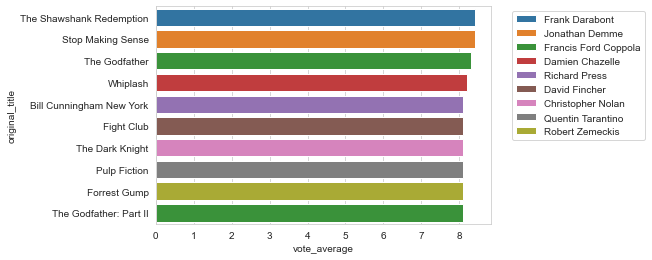

In [44]:
# visualizing the data
sns.barplot(x='vote_average', y=top10_len.index, data=top10_len, hue='director',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1), loc=2)

###  Question 10  Display the top 10 highest revenue movie titles?

In [45]:
revenuedf.nlargest(10,'revenue_adj')['original_title']

1386                             Avatar
1329                          Star Wars
5231                            Titanic
10594                      The Exorcist
9806                               Jaws
3          Star Wars: The Force Awakens
8889         E.T. the Extra-Terrestrial
8094                            The Net
10110    One Hundred and One Dalmatians
4361                       The Avengers
Name: original_title, dtype: object

In [46]:
top10=revenuedf.nlargest(10,'revenue_adj')[['original_title', 'revenue_adj']]\
.set_index('original_title')

In [47]:
top10

,revenue_adj
original_title,
Avatar,2.827124e+09
Star Wars,2.789712e+09
Titanic,2.506406e+09
The Exorcist,2.167325e+09
Jaws,1.907006e+09
Star Wars: The Force Awakens,1.902723e+09
E.T. the Extra-Terrestrial,1.791694e+09
The Net,1.583050e+09
One Hundred and One Dalmatians,1.574815e+09


Text(0.5, 1.0, 'Top 10 Highest Revenue Movie Titles')

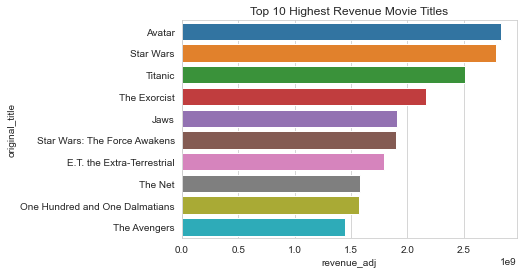

In [48]:
# visualizing the data
sns.barplot(x='revenue_adj', y=top10.index, data=top10)
plt.title("Top 10 Highest Revenue Movie Titles")

###  Question 11  Find the average rating of movies on year wise ?

In [49]:
revenuedf.groupby('release_year')['vote_average'].mean().sort_values(ascending=False)

release_year
1964    6.987500
1960    6.985714
1969    6.920000
1966    6.880000
1972    6.880000
1973    6.805882
1976    6.787500
1963    6.771429
1974    6.735294
1970    6.669231
1971    6.657143
1975    6.653333
1967    6.642857
1961    6.620000
1962    6.611111
1968    6.566667
1978    6.545833
1965    6.540000
1979    6.488889
1982    6.452500
1981    6.365000
1977    6.362500
2014    6.318860
1985    6.291045
1987    6.276389
1980    6.241026
2015    6.220370
1984    6.194340
1993    6.175000
2013    6.159836
1991    6.155714
2007    6.153333
2011    6.152697
1999    6.152542
1992    6.143902
1995    6.129000
1989    6.125974
1997    6.124299
1998    6.121698
2010    6.113761
2002    6.106475
1990    6.102597
1986    6.082895
2006    6.080583
2004    6.077439
2005    6.073370
2009    6.061000
2001    6.049219
2008    6.041748
2003    6.041007
1994    6.017241
1996    6.014423
1988    6.012346
2012    5.993056
2000    5.969369
1983    5.944231
Name: vote_average, dtype: float64

###  Question 12  Movies Based on Ratings [Excellent, Good and Average] 

In [50]:
def vote_average(vote_average):
    if vote_average >= 7.0:
        return "Excellent"
    elif vote_average>=6.0:
        return "Good"
    else:
        return "Average"
    

In [51]:
# creating new column to satsfiye the above condition
revenuedf['rating_cat']=revenuedf['vote_average'].apply(vote_average)

In [52]:
revenuedf.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,rating_cat
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Good
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Excellent
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Good


###  Question 13  Count the number of action movies? 

In [53]:
#cheking data taype  
revenuedf['genres'].dtype

dtype('O')

In [54]:
# since its str data type we apply str methods
len(revenuedf[revenuedf['genres'].str.contains('Action', case=False)]) # to make it case insensetive 

1261

<Strong>There are 1261 Action movies in our datasat <strong>

###  Question 14  Find the unique values from generes?

In [55]:
revenuedf.genres.str.split('|',expand=True).stack().value_counts()

Drama              2275
Comedy             1771
Thriller           1424
Action             1261
Romance             877
Adventure           843
Crime               774
Science Fiction     587
Horror              561
Family              513
Fantasy             461
Mystery             410
Animation           237
Music               186
History             153
War                 137
Documentary         102
Western              65
Foreign              31
TV Movie              1
dtype: int64

###  Question 15  Which director produces the higher number of movies? (Top 10)

In [56]:
revenuedf['director'].value_counts().head(n=10)

Steven Spielberg     27
Clint Eastwood       26
Woody Allen          22
Ridley Scott         22
Ron Howard           18
Martin Scorsese      18
Steven Soderbergh    17
Tim Burton           16
Tony Scott           16
Joel Schumacher      16
Name: director, dtype: int64

<a id='conclusions'></a>
## Conclusions

 
1. Genres does not have trendy from the data anlysis.
    
2. Budget has a positive relationship with revenues. as the budget increases the revenue is also increased. 
    
3.  Carlos,The Green Mile and Magnolia are the top three which has higher runtime.  

4. The higher avarage revenue generated on 2015.

5. Avatar is the most popular movie with highest revenue.

6. the highest number of movie was produced by  Steven Spielberg  and  he produced 27 movies.

## References 

<ol>
<li><a href="https://udacity.com">udacity.com</a></li>
<li><a href="https://stackoverflow.com/">stackoverflow</a></li>
<li><a href="https://www.askpython.com/">askpython</a></li>
<li><a href="https://www.datasciencemadesimple.com/">datasciencemadesimple</a></li>
<li><a href="https://pythonexamples.org/pandas-dataframe-delete-column/">pythonexamples</a></li>
<li><a href="https://pythonguides.com/python-pandas-drop-duplicates/">pythonguides</a></li>
<li><a href="https://www.machinelearningplus.com/">machinelearningplus</a></li>
  
<li>Python Data Analytics reference books </li>   
</ol>
